In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import kalman

# パラメータ設定
T = 1000  # データの長さ
a = -0.5  # AR(1)過程のパラメータ
su = 5
sw = 5

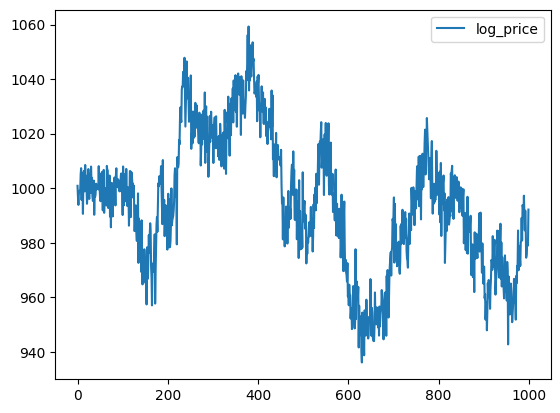

In [2]:
# データ生成
df = kalman.data_gen(a, su, sw, T, True)

In [4]:
df = kalman.calc_base_return(df)

<Axes: >

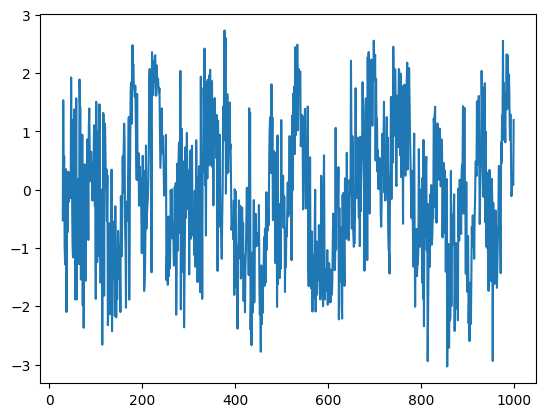

In [5]:
df["cci"].plot()

<Axes: >

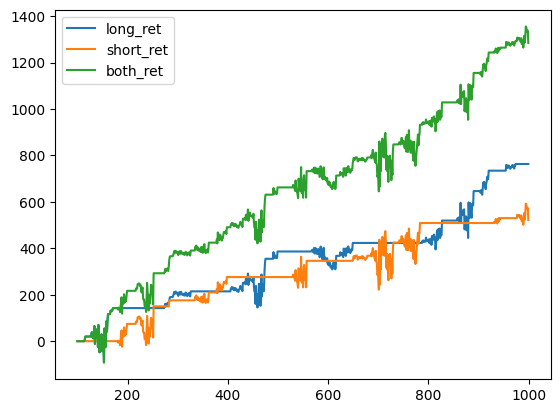

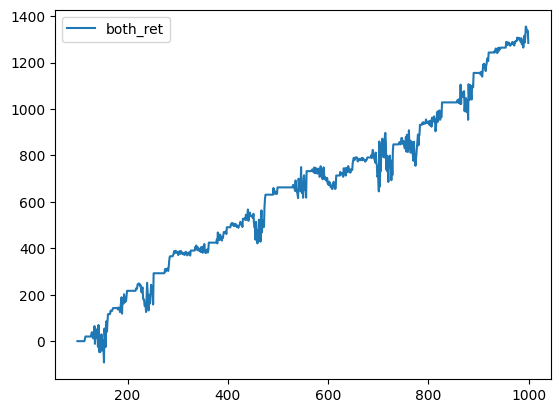

In [6]:
# 可視化
df[["long_ret","short_ret", "both_ret"]].iloc[100:].cumsum().plot()
df[["both_ret"]].iloc[100:].cumsum().plot()